This notebook investigates how cycles formed inside MRHIER.

Sample source vocabulary: AOT
- 241 AUIs
- 3 out of 6 contexts have cycles
    - context 1: [('A10759068', 'A10759290'), ('A10759290', 'A10759300'), ('A10759300', 'A10759068')]
    - context 2: [('A10759348', 'A10759090'), ('A10759090', 'A10759290'), ('A10759290', 'A10759068'), ('A10759068', 'A10759348')]
    - context 3: [('A10759068', 'A10759304'), ('A10759304', 'A10759145'), ('A10759145', 'A10759204'), ('A10759204', 'A10759533'), ('A10759533', 'A10759068')]

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import MRHIER.RRF
mrhier = pd.read_csv('../../2018AB_RRF/META/MRHIER.RRF', sep='|', header=None, dtype=object)

In [3]:
# Give columns names and drop the last column
mrhier.drop(9, axis=1, inplace=True)
mrhier.columns = ['CUI', 'AUI', 'CXN', 'PAUI', 'SAB', 'RELA', 'PTR', 'HCD', 'CVF']

In [4]:
aot = mrhier[mrhier['SAB'] == 'AOT']

In [5]:
aot.describe()

,CUI,AUI,CXN,PAUI,SAB,RELA,PTR,HCD,CVF
count,291,291,291,0.0,291,0.0,290,0.0,0.0
unique,239,241,6,0.0,1,0.0,73,0.0,0.0
top,C1563107,A10759470,1,NaN,AOT,NaN,A10759348,NaN,NaN
freq,3,3,241,NaN,291,NaN,27,NaN,NaN


In [6]:
G = nx.Graph()
for index, row in aot[aot['CXN'] == '3'].iterrows():
    if pd.isna(row['PTR']):
        continue
    parents = row['PTR'].split('.')
    for i, p in enumerate(parents[:-1]):
        G.add_edge(p, parents[i+1])
    G.add_edge(parents[-1], row['AUI'])

In [7]:
aot[aot['CXN'] == '3']

,CUI,AUI,CXN,PAUI,SAB,RELA,PTR,HCD,CVF
17233535,C1562041,A10759470,3,NaN,AOT,NaN,A10759348.A10759071.A10759385,NaN,NaN
17233665,C1562055,A10759442,3,NaN,AOT,NaN,A10759348.A10759308.A10759404.A10759392.A10759386,NaN,NaN
17240013,C1562188,A10759471,3,NaN,AOT,NaN,A10759348.A10759071.A10759386,NaN,NaN
17253869,C1562632,A10759163,3,NaN,AOT,NaN,A10759348.A10759090.A10759290,NaN,NaN
17259192,C1562758,A10759385,3,NaN,AOT,NaN,A10759348.A10759308.A10759404.A10759392,NaN,NaN
17265055,C1562983,A10759432,3,NaN,AOT,NaN,A10759348.A10759308.A10759404.A10759392.A10759385,NaN,NaN
17266962,C1563107,A10759386,3,NaN,AOT,NaN,A10759348.A10759308.A10759404.A10759392,NaN,NaN
17267580,C1563149,A10759422,3,NaN,AOT,NaN,A10759348.A10759090.A10759290,NaN,NaN
17270451,C1563236,A10759435,3,NaN,AOT,NaN,A10759348.A10759090.A10759290,NaN,NaN
17492552,C1704544,A10759280,3,NaN,AOT,NaN,A10759348.A10759090.A10759290,NaN,NaN


In [8]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 17\nNumber of edges: 18\nAverage degree:   2.1176'

In [9]:
nx.is_tree(G)

False

In [10]:
nx.find_cycle(G)

[('A10759348', 'A10759071'),
 ('A10759071', 'A10759385'),
 ('A10759385', 'A10759392'),
 ('A10759392', 'A10759404'),
 ('A10759404', 'A10759308'),
 ('A10759308', 'A10759348')]

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:518: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


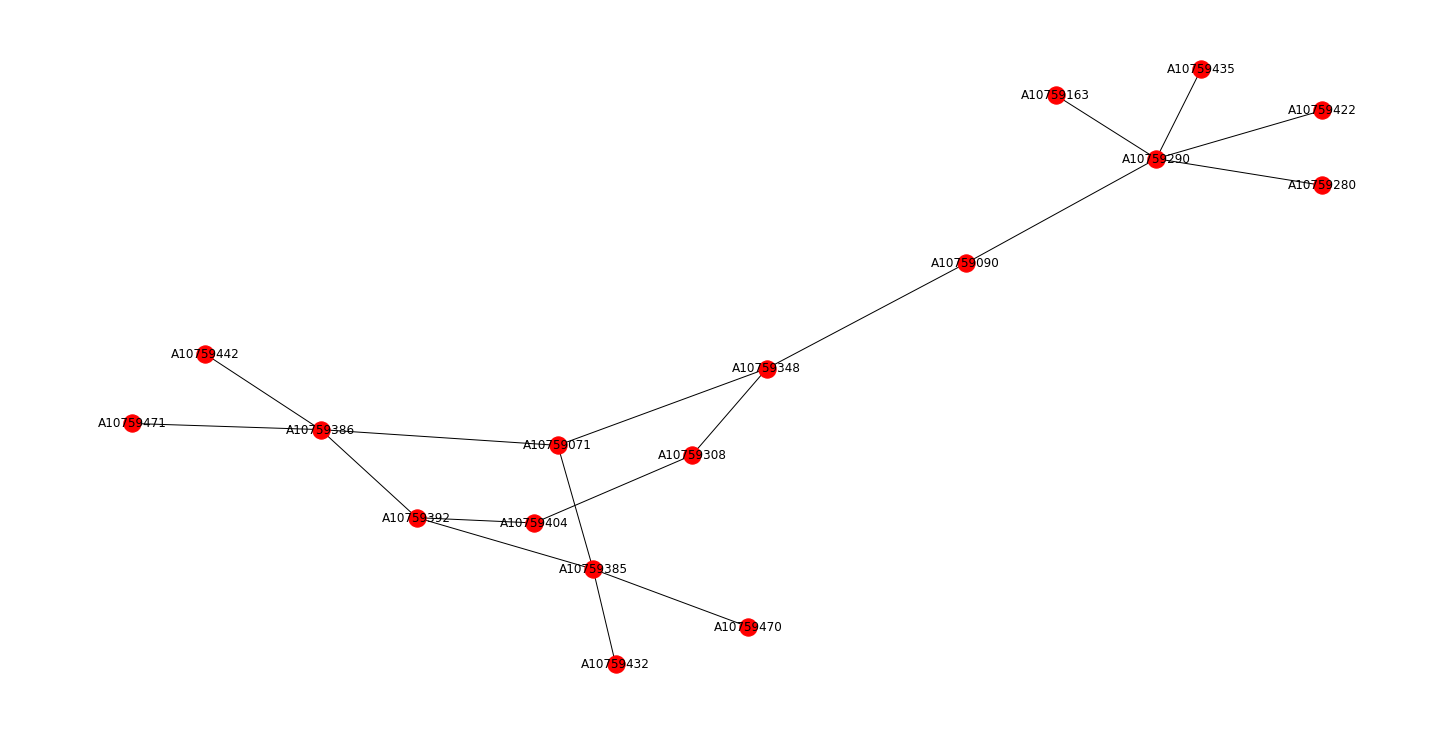

In [11]:
plt.figure(figsize=(20, 10))
nx.draw(G, with_labels=True)
plt.draw()

In [12]:
aot[aot['AUI'] == "A10759068"]

,CUI,AUI,CXN,PAUI,SAB,RELA,PTR,HCD,CVF
13407528,C0949744,A10759068,1,NaN,AOT,NaN,A10759348,NaN,NaN
